In [1]:
# Logistic Regression

# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('ggplot') 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
data = pd.read_csv('Diabetes_data.csv')

In [3]:
# Sample dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# data decription
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# correlations of each features in dataset
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


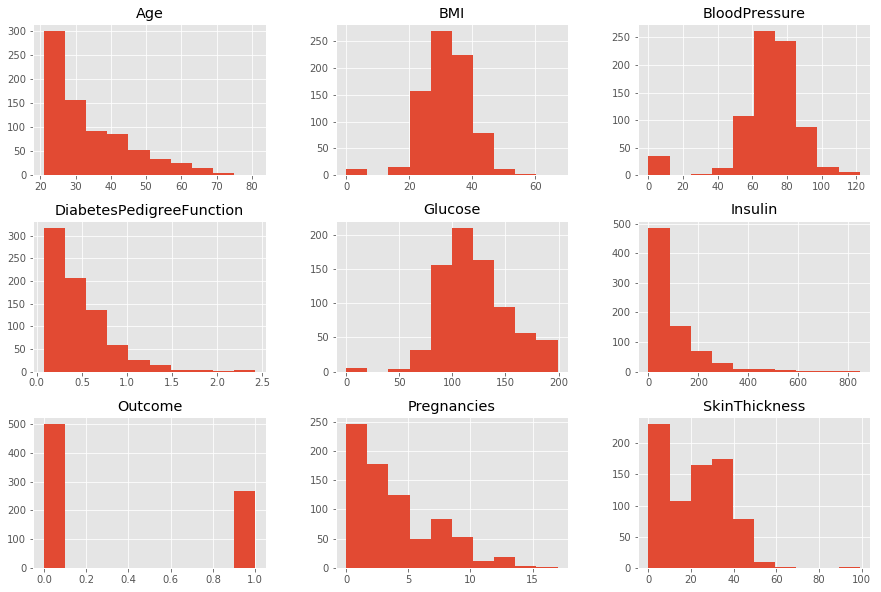

In [7]:
# histograms
data.hist(figsize=(15,10))
plt.figure();

{'boxes': [<matplotlib.lines.Line2D at 0x1f5fd152550>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5fd15d898>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f5fd16c160>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f5fd164908>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1f5fd152710>,
  <matplotlib.lines.Line2D at 0x1f5fd1739e8>]}

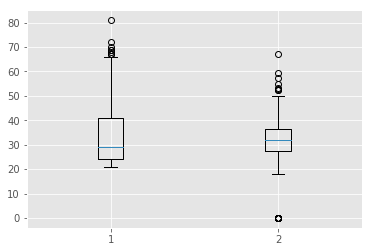

In [8]:
plt.boxplot([data['Age'], data['BMI']])

In [9]:
def evaluation(y, y_pred):
    print("MSE: {}".format(mean_squared_error(y, y_pred)))
    print("Accuracy Score:", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred))
    print("Recall:", recall_score(y, y_pred))
    print("F1 Score:", f1_score(y, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
    cm = pd.crosstab(y, y_pred)

In [10]:
y = np.array(data['Outcome'])
X = np.array(data.drop(columns=['Outcome'], axis=1))

In [11]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# W/O Scaling or Normalization
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
print("Logistic regressin Report:")
evaluation(y_test,y_pred)

Logistic regressin Report:
MSE: 0.24025974025974026
Accuracy Score: 0.7597402597402597
Precision: 0.68
Recall: 0.6181818181818182
F1 Score: 0.6476190476190475
Confusion Matrix:
 [[83 16]
 [21 34]]


In [13]:
# With Standard Scaling 
SS = StandardScaler()

X_train_scaled = SS.fit_transform(X_train)
X_test_scaled = SS.transform(X_test)

lr = LogisticRegression(max_iter=150)
lr.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test_scaled)
print("Logistic regressin Report (Standard Scaling):")
evaluation(y_test,y_pred)

Logistic regressin Report (Standard Scaling):
MSE: 0.24675324675324675
Accuracy Score: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142858
Confusion Matrix:
 [[79 20]
 [18 37]]


In [14]:
# Normalize the data 
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

X_train_norm = (X_train - means)/stds
X_test_norm = (X_test- means)/stds

lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

y_pred = lr.predict(X_test_norm)
print("Logistic regressin Report (Normalized Data):")
evaluation(y_test,y_pred)

Logistic regressin Report (Normalized Data):
MSE: 0.24675324675324675
Accuracy Score: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142858
Confusion Matrix:
 [[79 20]
 [18 37]]


In [15]:
# With MinMax Scaling 
MMS = MinMaxScaler()

X_train_scaled = MMS.fit_transform(X_train)
X_test_scaled = MMS.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test_scaled)
print("Logistic regressin Report (MinMax Scaling):")
evaluation(y_test,y_pred)

Logistic regressin Report (MinMax Scaling):
MSE: 0.22077922077922077
Accuracy Score: 0.7792207792207793
Precision: 0.7333333333333333
Recall: 0.6
F1 Score: 0.6599999999999999
Confusion Matrix:
 [[87 12]
 [22 33]]


Feature: 0, Score: 0.83993
Feature: 1, Score: 3.70291
Feature: 2, Score: -1.07395
Feature: 3, Score: 0.15553
Feature: 4, Score: -0.14099
Feature: 5, Score: 2.58524
Feature: 6, Score: 0.98352
Feature: 7, Score: 1.70806


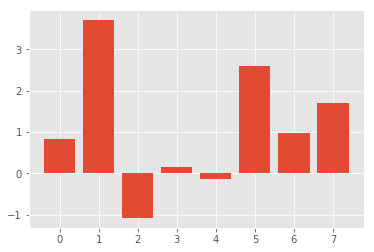

In [16]:
# Features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
# get importance 
importance = lr.coef_[0]

# summarize feature importance for normalized model
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show();

In [17]:
# Hyperparameter tuning
penalty = ['l1', 'l2']
C = [0.0001,0.001,0.01,0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C, solver=solver)

grid = GridSearchCV(estimator=lr, param_grid=param_grid, 
                    verbose=1, cv=10)

best_model = grid.fit(X_train_norm, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    2.2s finished


In [18]:
y_pred = best_model.predict(X_test_norm)
evaluation(y_test, y_pred)

MSE: 0.23376623376623376
Accuracy Score: 0.7662337662337663
Precision: 0.6862745098039216
Recall: 0.6363636363636364
F1 Score: 0.660377358490566
Confusion Matrix:
 [[83 16]
 [20 35]]
